# How are recent grads doing?

## Visualizing the outcomes of grads surveyed between 2010-2012

The data I'll be exploring here is part of the larger American Community Survey. This specific subset was compiled by FiveThirtyEight and contains information about grads from different majors such as the share of unemployed grads, the ratio of men:women etc. 

I'll be using this data to address four main questions:
- What is the average salary across all the majors recorded?
- Do grads in popular majors fare better than those in less popular majors?
- Which majors have the most/least amount of women?
- Do majors with more/less women have lower/higher salaries? 

### Importing, exploring and cleaning the data

In [1]:
# Importing the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring the data
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.columns)
print('Rows:' + str(recent_grads.shape[0]))

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')
Rows:173


In [2]:
# Exploring the data
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
# Removing rows with null values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

In [4]:
# Changing proportions to percentrage values

for col in ['Unemployment_rate','ShareWomen']:
    recent_grads[col] = recent_grads[col] * 100 

In [5]:
# Creating an overview of the data
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172,172.000000,172.000000,172.000000,172,172.000000,172.000000,172.00000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,NaN,NaN,172,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,AREA ETHNIC AND CIVILIZATION STUDIES,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.377907,3895.953488,NaN,39370.081395,16723.406977,22646.674419,NaN,52.222336,357.941860,31355.80814,...,8877.232558,19798.843023,2428.412791,6.802373,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,NaN,63483.491009,28122.433474,41057.330740,NaN,23.120499,619.680419,50777.42865,...,14679.038729,33229.227514,4121.730452,3.033953,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.00000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,NaN,4549.750000,2177.500000,1778.250000,NaN,33.602621,42.000000,3734.75000,...,1013.750000,2474.750000,299.500000,5.026115,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,NaN,15104.000000,5434.000000,8386.500000,NaN,53.402404,131.000000,12031.50000,...,3332.500000,7436.500000,905.000000,6.754448,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,NaN,38909.750000,14631.000000,22553.750000,NaN,70.329921,339.000000,31701.25000,...,9981.000000,17674.750000,2397.000000,8.724658,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000


In [6]:
# Defining function to remove unnecessary plot elements generated automatically in matplolib

def simplify_ax(axis):
    """ Removes spines and removes ticks """
    axis.spines["right"].set_visible(False)
    axis.spines["left"].set_visible(False)
    axis.spines["top"].set_visible(False)    
    axis.spines["bottom"].set_visible(False)
    axis.tick_params(bottom=False, top=False, left=False, right=False)
    ax.grid(False)
    return axis

### Plots

### Fig. 1: What is the distribution of median salaries amongst the majors recorded here?

Text(0, 0.5, 'Frequency')

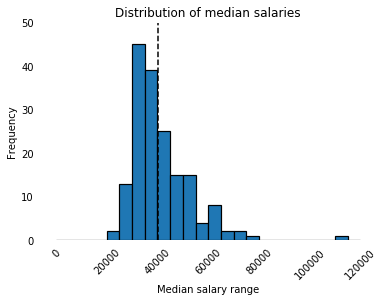

In [7]:
ax = recent_grads['Median'].hist(bins=24, xrot=45, range=(0,120000), edgecolor='black', linewidth=1.2)
ax.axvline(np.mean(recent_grads['Median']), c='black', lw=1.5, ls='dashed')
ax.set_ylim(0,50)
ax = simplify_ax(ax)
ax.set_title('Distribution of median salaries')
ax.set_xlabel('Median salary range')
ax.set_ylabel('Frequency')

The plot shows that the average of the median salaries of all majors is \\$35,000 (black dashed line). However, most median salaries fall between \\$30,000 and \\$40,000. 

### Fig 2.: Do popular majors fare better in terms of salary and employment?

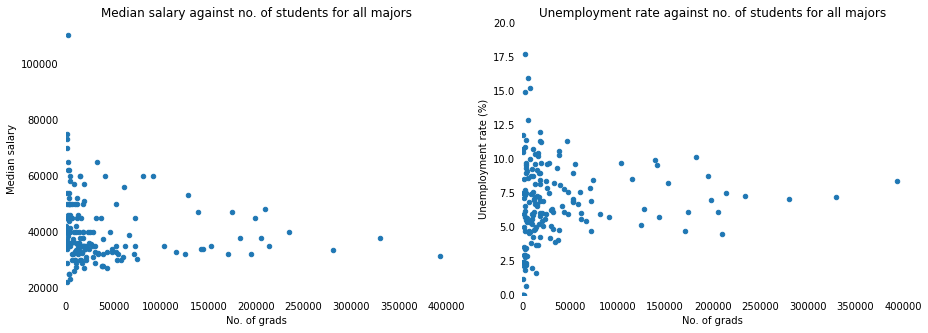

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15,5)

recent_grads.plot(x='Total', y='Median', kind='scatter', ax=ax1)
ax1.set_xlabel('No. of grads')
ax1.set_ylabel('Median salary')
ax1.set_title('Median salary against no. of students for all majors')
ax1.set_xlim(0, 400000)
ax1 = simplify_ax(ax1)

recent_grads.plot(x='Total', y='Unemployment_rate', kind='scatter', ax=ax2)
ax2.set_xlabel('No. of grads')
ax2.set_ylabel('Unemployment rate (%)')
ax2.set_title('Unemployment rate against no. of students for all majors')
ax2.set_xlim(0, 400000)
ax2.set_ylim(0,20)
ax2 = simplify_ax(ax2)

plt.show()

It looks like 'popularity' of the major, doesn't have a massive effect on the outcomes, since such 'popular' majors are in the middle of the range for both salary and unemployment. It is interesting to note that the outliers on either end of the spectrum are 'rare' majors. This is true for both salary and unemploment. 

### Fig 3.: Which majors have the highest unemployment rate? Which have the lowest?

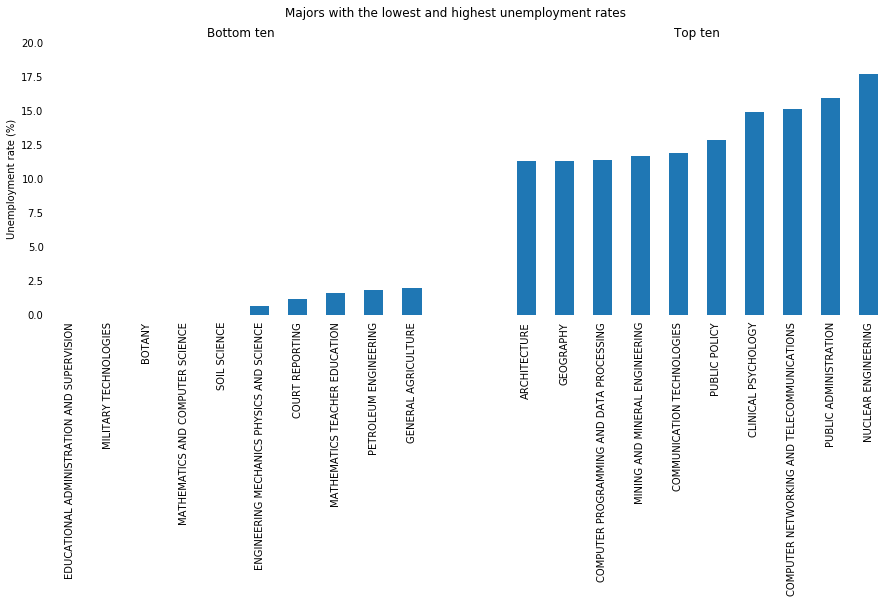

In [9]:
# Sorting majors by share of women
sorted = recent_grads.sort_values(by='Unemployment_rate')

# Instatiating figure/axes objects
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Majors with the lowest and highest unemployment rates')
fig.set_size_inches(15,5)

# Plotting bottom ten 
sorted[:10].plot.bar(x='Major', y='Unemployment_rate', ax=ax1)
ax1.set_title('Bottom ten')
ax1.set_ylim(0,20)
ax1.set_ylabel('Unemployment rate (%)')
ax1.set_xlabel(None)
ax1 = simplify_ax(ax1)
ax1.get_legend().remove()

# Plotting top ten 
sorted[-10:].plot.bar(x='Major', y='Unemployment_rate', ax=ax2)
ax2.set_title('Top ten')
ax2.set_ylim(0,20)
ax2.set_xlabel(None)
ax2 = simplify_ax(ax2)
ax2.get_legend().remove()


plt.show()

### Fig 4.: Does the proportion of grads working full-time affect the recorded median salary?

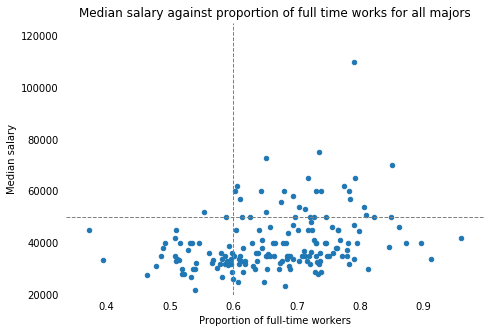

In [10]:
# Calculating proportion of full-time workers
recent_grads['Proportion_full_time'] = recent_grads['Full_time'] / recent_grads['Total']

# Plotting data
ax = recent_grads.plot(x='Proportion_full_time', y='Median', kind='scatter')
ax.set_title('Median salary against proportion of full time works for all majors')
ax.set_ylabel('Median salary')
ax.set_xlabel('Proportion of full-time workers')
ax.set_ylim(20000, 125000)
ax.axhline(50000, c='grey', ls='dashed', lw=1)
ax.axvline(0.6, c='grey', ls='dashed', lw=1)
ax = simplify_ax(ax)

fig = plt.gcf()
fig.set_size_inches(7.5,5)
plt.show()

There does seem to be a <i>slight</i> correlation here. Majors with median salaries above \\$50,000 (horizontal grey line) largely have full-time rates of above 60\% (vertical grey).However, most majors recorded have rates above 60\% and still report average salaries (below \\$40,000). 

### Fig. 5: Which majors have the lowest share of women? Which majors have the highest?

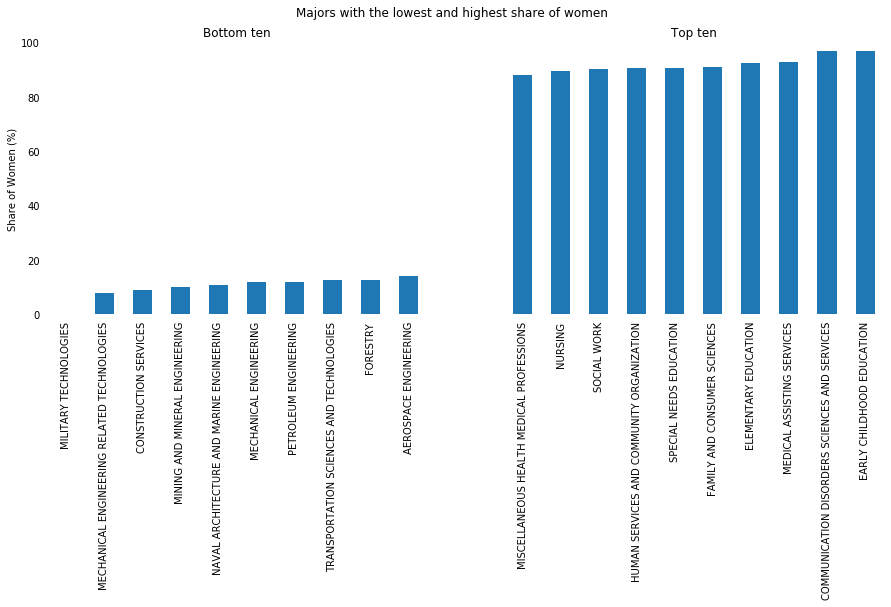

In [11]:
# Sorting majord by share of women
sorted = recent_grads.sort_values(by='ShareWomen')

# Instatiating figure/axes objects
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Majors with the lowest and highest share of women')
fig.set_size_inches(15,5)

# Plotting bottom ten 
sorted[:10].plot.bar(x='Major', y='ShareWomen', ax=ax1)
ax1.set_title('Bottom ten')
ax1.set_ylim(0,100)
ax1.set_ylabel('Share of Women (%)')
ax1 = simplify_ax(ax1)
ax1.set_xlabel(None)
ax1.get_legend().remove()

# Plotting top ten 
sorted[-10:].plot.bar(x='Major', y='ShareWomen', ax=ax2)
ax2.set_title('Top ten')
ax2.set_ylim(0,100)
ax2 = simplify_ax(ax2)
ax2.set_xlabel(None)
ax2.get_legend().remove()

plt.show()

### Fig. 6: Does the proportion of men and women affect the recorded median salary?

Do majors with mostly men, for instance, have high median salaries? This could be indicative of a wage disparity between men and women.

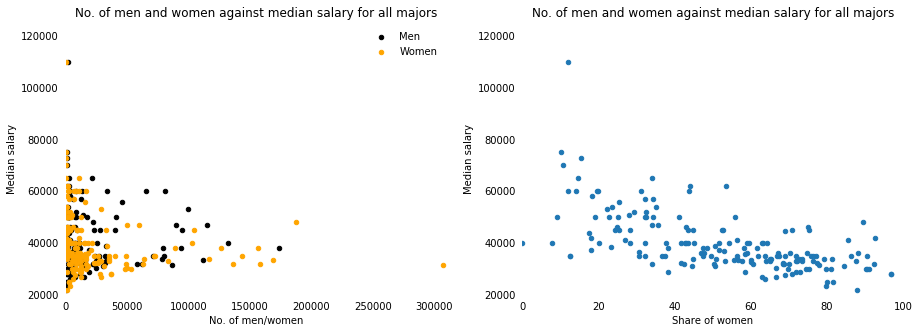

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15,5)

recent_grads.plot(x='Men', y='Median', kind='scatter', c='black', label='Men', ax=ax1)
recent_grads.plot(x='Women', y='Median', kind='scatter', c='orange', label='Women', ax=ax1)
ax1.set_ylabel('Median salary')
ax1.set_xlabel('No. of men/women')
ax1.set_xlim(0,310000)
ax1.set_ylim(20000, 125000)
ax1.legend(frameon=False)
ax1.set_title('No. of men and women against median salary for all majors')
ax1 = simplify_ax(ax1)

recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', ax=ax2)
ax2.set_ylabel('Median salary')
ax2.set_xlabel('Share of women')
ax2.set_xlim(0,100)
ax2.set_ylim(20000, 125000)
ax2.set_title('No. of men and women against median salary for all majors')
ax2 = simplify_ax(ax2)

plt.show()

The left panel shows that some majors in which men are heavily represented have above average salaries. On the other hand, majors in which women are heavily represented seem to have average salaries.<br>
Still, the panel on the right confirms that median salaries go down as the share of women increases. 